<a href="https://colab.research.google.com/github/MinhBaLe/projet-data-science-credit-risk/blob/main/Code_ISD_projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Mounted at /content/drive


In [ ]:
credit_risk = pd.read_table('/content/drive/MyDrive/credit_risk_dataset.csv', sep = ',')
credit_risk

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
credit_risk.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
credit_risk.shape

(32581, 12)

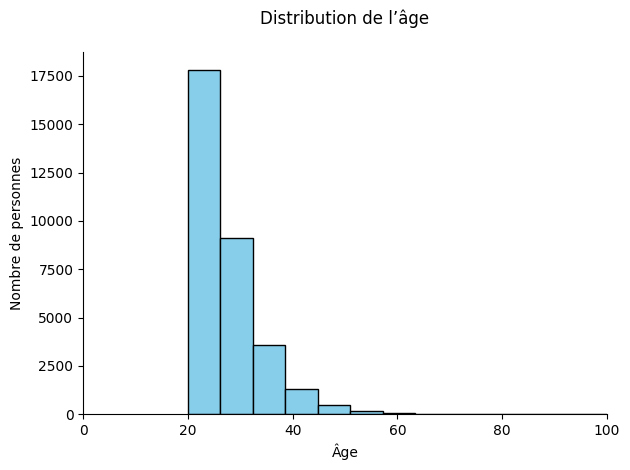

In [ ]:
fig, ax = plt.subplots()

credit_risk['person_age'].plot(
    kind='hist',
    bins=20,
    color='skyblue',
    edgecolor='black',
    ax=ax
)

ax.set_title('Distribution de l’âge', pad=20)
ax.set_xlabel("Âge")
ax.set_ylabel("Nombre de personnes")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)
ax.set_xlim(0, 100)

plt.tight_layout()
plt.show()

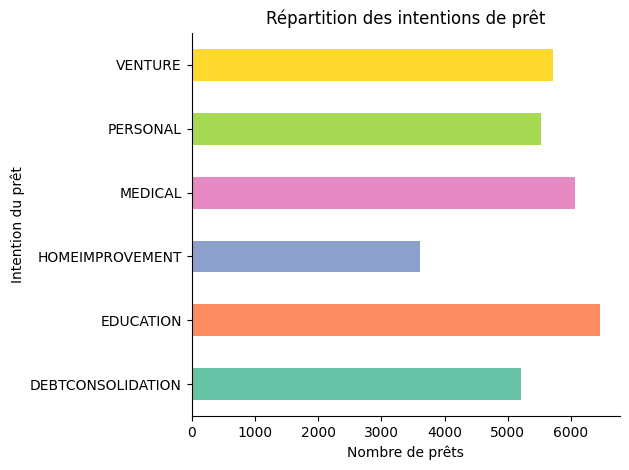

In [ ]:
ax = credit_risk.groupby('loan_intent').size().plot(
    kind='barh',
    color=sns.color_palette('Set2')
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)
plt.xlabel("Nombre de prêts")
plt.ylabel("Intention du prêt")
plt.title("Répartition des intentions de prêt")
plt.tight_layout()
plt.show()

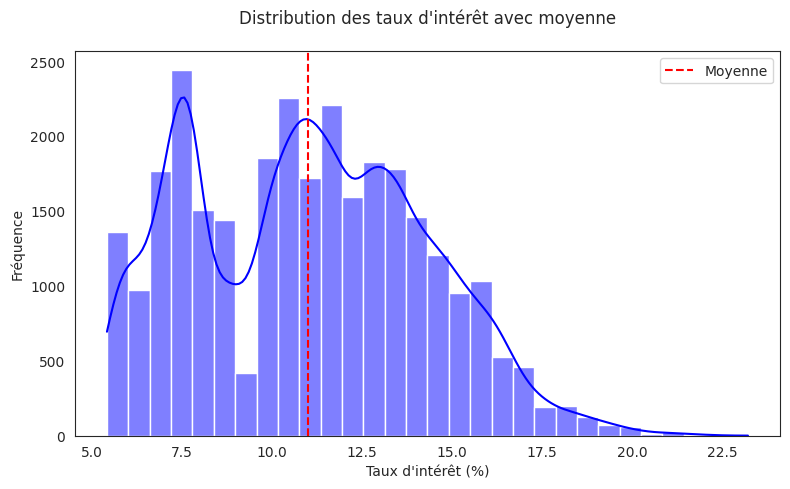

In [ ]:
plt.figure(figsize=(8, 5))
# Style et histogramme
sns.set_style("white")
ax = sns.histplot(credit_risk['loan_int_rate'], bins=30, kde=True, color='blue')
# Ligne verticale pour la moyenne avec label
plt.axvline(
    credit_risk['loan_int_rate'].mean(),
    color='red',
    linestyle='--',
    label='Moyenne'
)

plt.title("Distribution des taux d'intérêt avec moyenne", pad=20)
plt.xlabel("Taux d'intérêt (%)")
plt.ylabel("Fréquence")
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-9-0de86b00b2b2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_grade', y='loan_int_rate', data=credit_risk, palette='viridis')


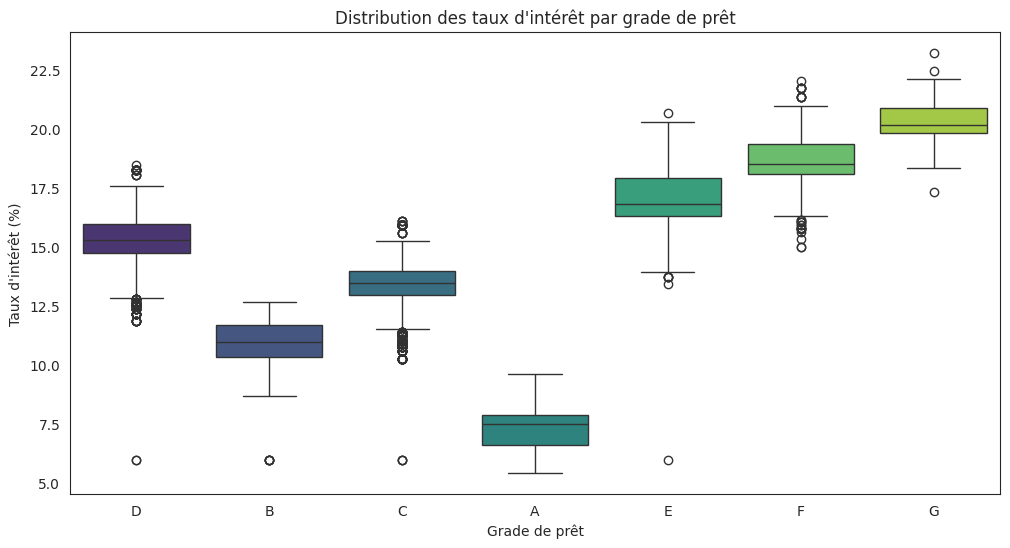

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_grade', y='loan_int_rate', data=credit_risk, palette='viridis')
plt.title("Distribution des taux d'intérêt par grade de prêt")
plt.xlabel("Grade de prêt")
plt.ylabel("Taux d'intérêt (%)")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
# Sélectionner uniquement les colonnes numériques
numerical_cols = credit_risk.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = credit_risk.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
scaler = StandardScaler()
credit_risk[numerical_cols] = scaler.fit_transform(credit_risk[numerical_cols])

In [ ]:
from sklearn.model_selection import train_test_split
X = credit_risk.drop('loan_status', axis=1)
y = credit_risk['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
X_scaled = scaler.fit_transform(credit_risk[numerical_cols])

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_scaled = imputer.fit_transform(credit_risk[numerical_cols])
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print(f"Nombre de composantes : {pca.n_components_}")

Nombre de composantes : 6


In [ ]:
import numpy as np
pca_full = PCA().fit(X_scaled)
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

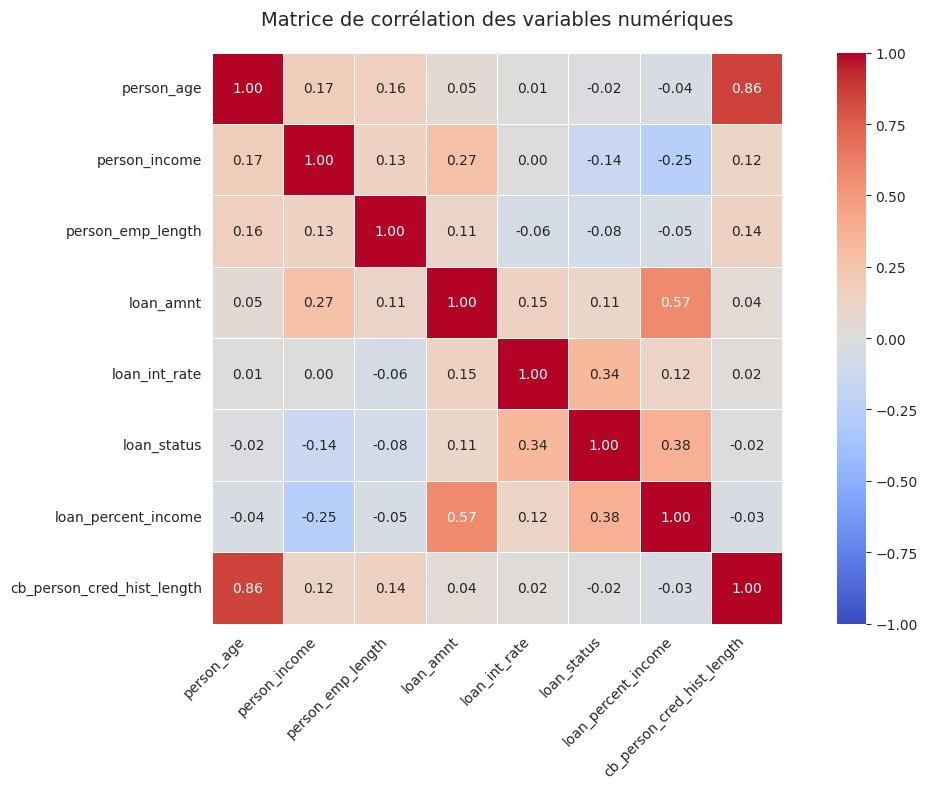

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = numerical_credit_risk.corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    vmin=-1,
    vmax=1,
    center=0,
    linewidths=0.5,
    linecolor='white',
    square=True
)

plt.title("Matrice de corrélation des variables numériques", pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

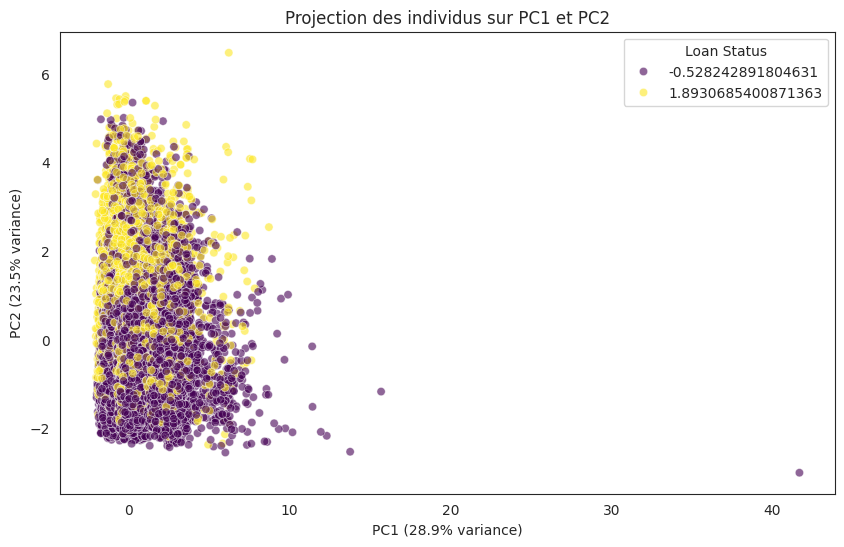

In [ ]:
# Projection sur les 2 premières composantes (PC1 et PC2)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=credit_risk['loan_status'], palette='viridis', alpha=0.6)
plt.xlabel(f"PC1 ({explained_variance[0]:.1%} variance)")
plt.ylabel(f"PC2 ({explained_variance[1]:.1%} variance)")
plt.title("Projection des individus sur PC1 et PC2")
plt.legend(title='Loan Status')
plt.show()

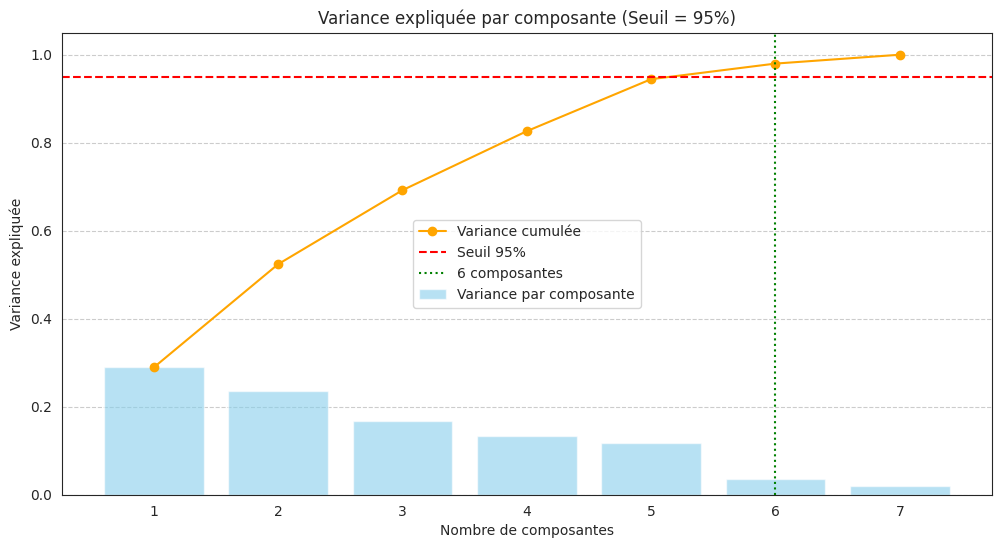

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(
    range(1, len(explained_variance) + 1),
    explained_variance,
    alpha=0.6,
    color='skyblue',
    label='Variance par composante'
)

plt.plot(
    range(1, len(cumulative_variance) + 1),
    cumulative_variance,
    marker='o',
    color='orange',
    label='Variance cumulée'
)

plt.axhline(y=0.95, color='red', linestyle='--', label='Seuil 95%')
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
plt.axvline(x=n_components_95, color='green', linestyle=':', label=f'{n_components_95} composantes')

plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliquée")
plt.title("Variance expliquée par composante (Seuil = 95%)")
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()

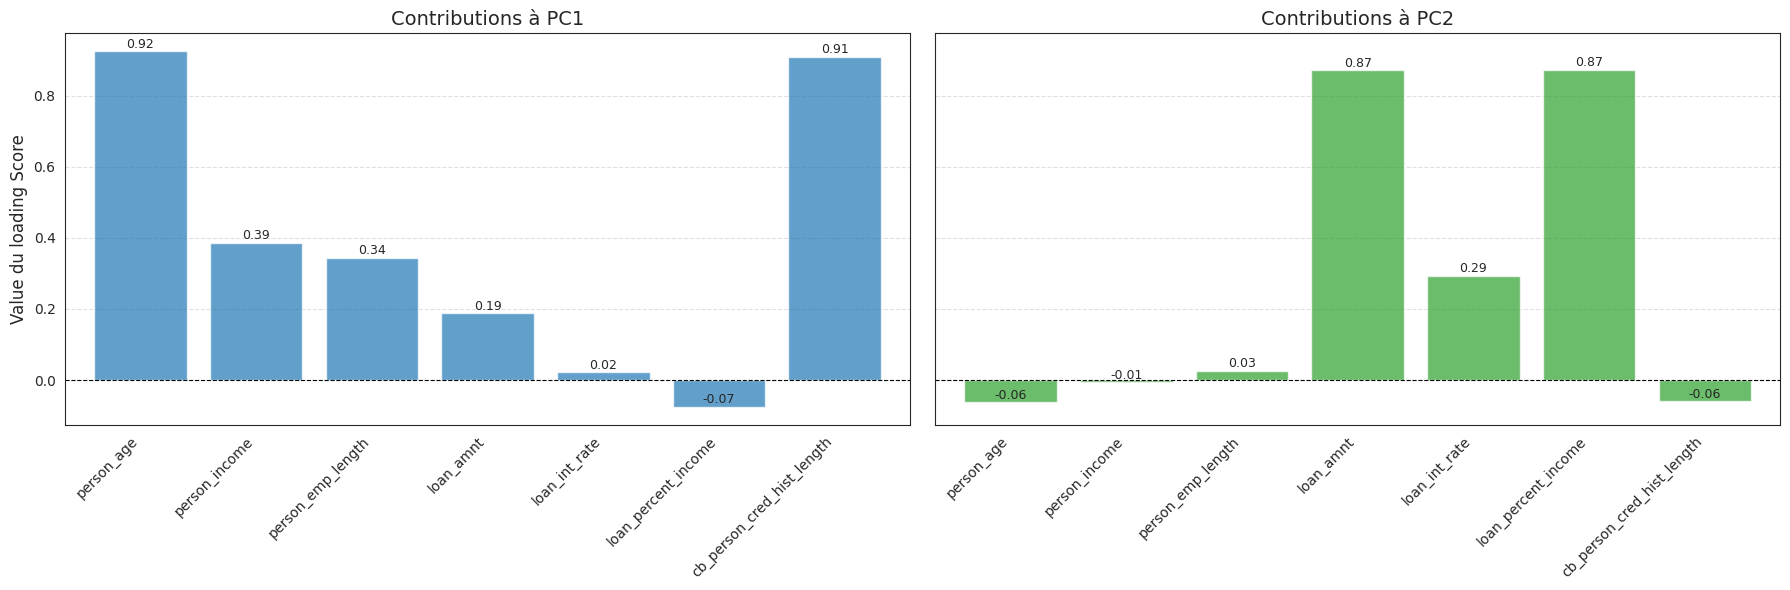

In [ ]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(
    loadings[:, :2],
    columns=['PC1', 'PC2'],
    index=['person_age', 'person_income', 'person_emp_length',
           'loan_amnt', 'loan_int_rate', 'loan_percent_income',
           'cb_person_cred_hist_length']
)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

colors = ['#1f77b4', '#2ca02c']  # Bleu et vert
# PC1
loadings_df['PC1'].plot(kind='bar', ax=ax1, color=colors[0], alpha=0.7, width=0.8)
ax1.set_title('Contributions à PC1', fontsize=14)
ax1.set_ylabel('Value du loading Score', fontsize=12)
ax1.axhline(0, color='black', linewidth=0.8, linestyle='--')
# PC2
loadings_df['PC2'].plot(kind='bar', ax=ax2, color=colors[1], alpha=0.7, width=0.8)
ax2.set_title('Contributions à PC2', fontsize=14)
ax2.axhline(0, color='black', linewidth=0.8, linestyle='--')
# Paramètres communs
for ax in [ax1, ax2]:
    ax.set_xticklabels(loadings_df.index, rotation=45, ha='right', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 5),
                   textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

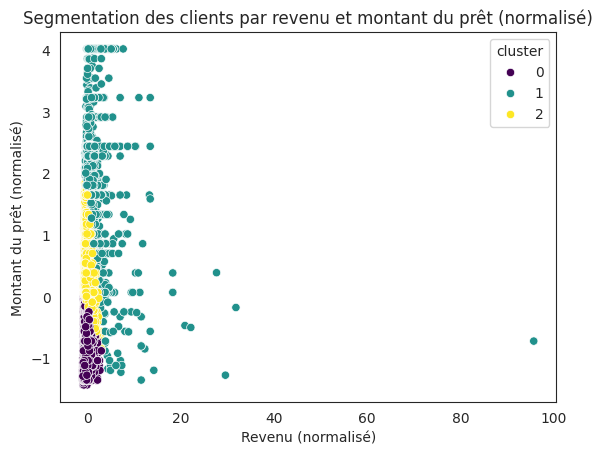

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

features = credit_risk[['person_income', 'loan_amnt']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
credit_risk['cluster'] = kmeans.fit_predict(features_scaled)

sns.scatterplot(
    x=credit_risk['person_income'],
    y=credit_risk['loan_amnt'],
    hue=credit_risk['cluster'],
    palette='viridis'
)
plt.title("Segmentation des clients par revenu et montant du prêt (normalisé)")
plt.xlabel("Revenu (normalisé)")
plt.ylabel("Montant du prêt (normalisé)")
plt.show()

<ipython-input-25-d8f76808f52d>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Variable', data=importance_df, palette='rocket')


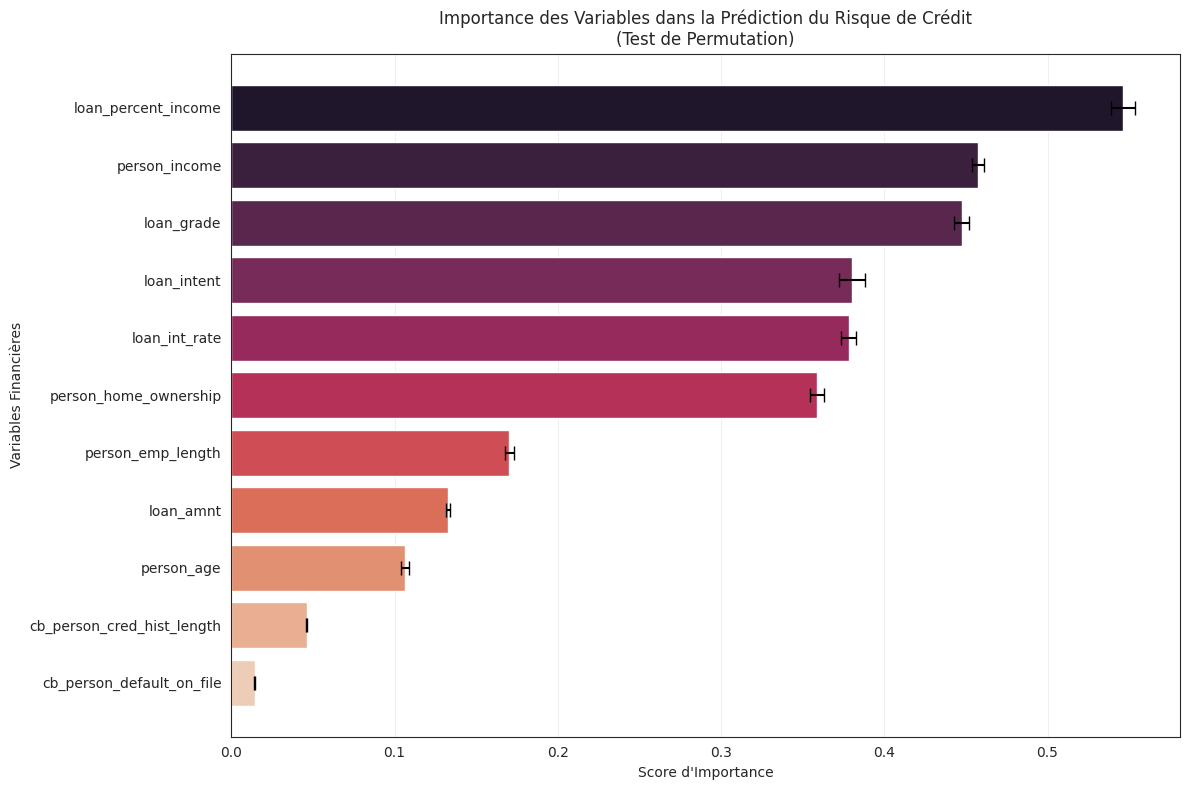

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor


numeric_features = ['person_age', 'person_income', 'person_emp_length',
                    'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                    'cb_person_cred_hist_length']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['person_home_ownership', 'loan_intent',
                       'loan_grade', 'cb_person_default_on_file']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestRegressor(n_estimators=100, random_state=42))])

pipeline.fit(X_train, y_train)

result = permutation_importance(pipeline, X_train, y_train, n_repeats=10, random_state=42)

importance_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Importance': result.importances_mean,
    'Ecart-type': result.importances_std
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Variable', data=importance_df, palette='rocket')
plt.errorbar(x=importance_df['Importance'],
             y=importance_df['Variable'],
             xerr=importance_df['Ecart-type'],
             fmt='none', c='black', capsize=5)
plt.title('Importance des Variables dans la Prédiction du Risque de Crédit\n(Test de Permutation)')
plt.xlabel('Score d\'Importance')
plt.ylabel('Variables Financières')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

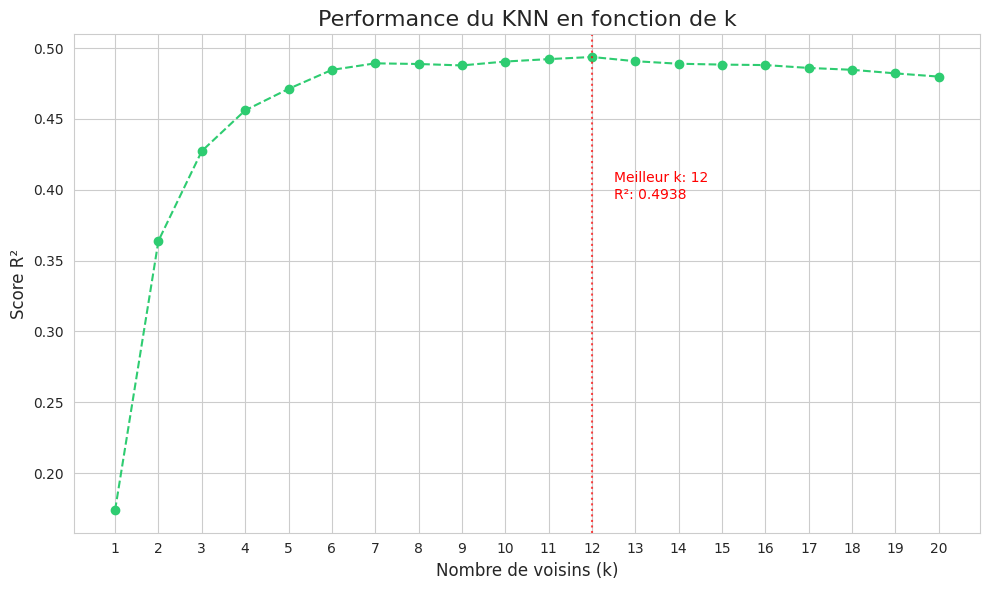

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
k_values = range(1, 21)
knn_r2_scores = []

for k in k_values:
    knn_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', KNeighborsRegressor(n_neighbors=k))
    ])
    knn_pipeline.fit(X_train, y_train)
    y_pred = knn_pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    knn_r2_scores.append(r2)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(k_values, knn_r2_scores, marker='o', linestyle='--', color='#2ecc71')

# Personnalisation
plt.title('Performance du KNN en fonction de k', fontsize=16)
plt.xlabel('Nombre de voisins (k)', fontsize=12)
plt.ylabel('Score R²', fontsize=12)
plt.xticks(k_values)

# Marquer le meilleur score
best_k = k_values[np.argmax(knn_r2_scores)]
best_score = max(knn_r2_scores)
plt.axvline(x=best_k, color='red', linestyle=':', alpha=0.7)
plt.text(best_k + 0.5, best_score - 0.1,
         f'Meilleur k: {best_k}\nR²: {best_score:.4f}',
         color='red')

plt.grid(True)
plt.tight_layout()
plt.show()

Régression Linéaire: R² = 0.3498
Random Forest: R² = 0.6785
KNN: R² = 0.4712


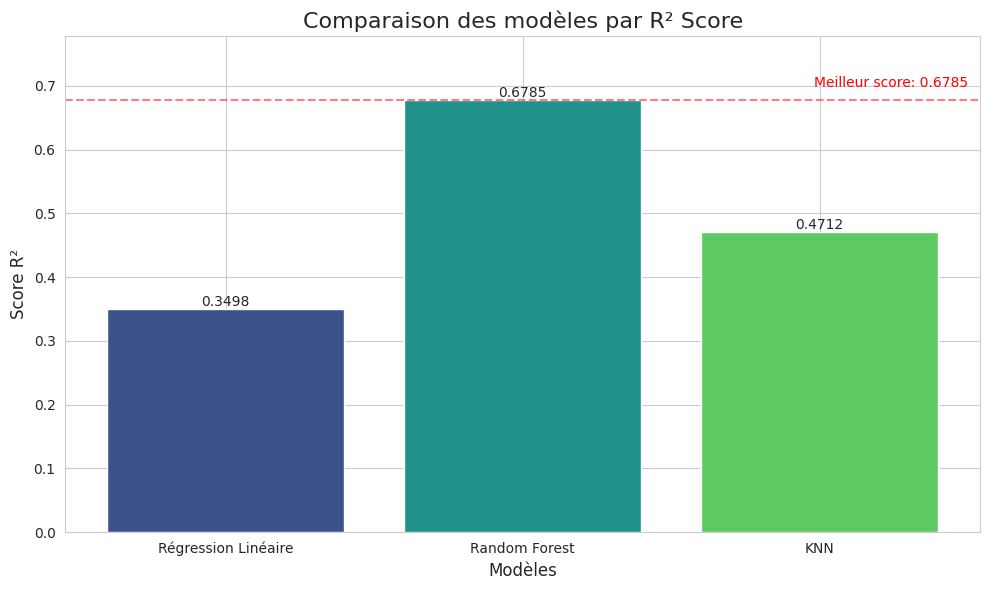

In [ ]:
from sklearn.linear_model import LinearRegression

models = {
    "Régression Linéaire": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results[name] = r2
    print(f"{name}: R² = {r2:.4f}")

methods = list(results.keys())
scores = list(results.values())

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
colors = sns.color_palette("viridis", len(methods))
bars = plt.bar(methods, scores, color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

# Personnalisation
plt.title('Comparaison des modèles par R² Score', fontsize=16)
plt.xlabel('Modèles', fontsize=12)
plt.ylabel('Score R²', fontsize=12)
plt.ylim(0, max(scores) + 0.1)  # Marge de 10% au-dessus du score max

# Ligne horizontale pour le meilleur score
best_score = max(scores)
plt.axhline(y=best_score, color='red', linestyle='--', alpha=0.5)
plt.text(len(methods)-0.5, best_score+0.02, f'Meilleur score: {best_score:.4f}',
         color='red', ha='right')

plt.tight_layout()
plt.show()